In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality' )
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service' )
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip' )

In [4]:
quality[ 'poor' ] = fuzz.trimf(quality.universe, [ 0, 0, 5])
quality[ 'acceptable' ] = fuzz.trimf(quality.universe, [ 0, 5, 10])
quality[ 'amazing' ] = fuzz.trimf(quality.universe, [ 5, 10, 10])

In [5]:
service[ 'bad' ] = fuzz.trimf(service.universe, [ 0, 0, 5])
service[ 'decent' ] = fuzz.trimf(service.universe, [ 0, 5, 10])
service[ 'great' ] = fuzz.trimf(service.universe, [ 5, 10, 10])

In [6]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip[ 'low' ] = fuzz.trimf(tip.universe, [ 0, 0, 13])
tip[ 'medium' ] = fuzz.trimf(tip.universe, [ 0, 13, 25])
tip[ 'high' ] = fuzz.trimf(tip.universe, [ 13, 25, 25])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/term.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


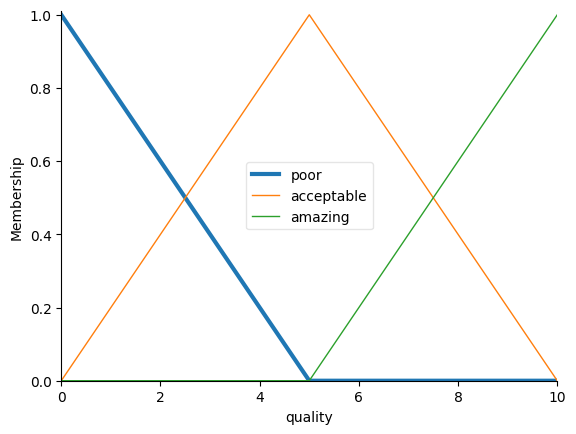

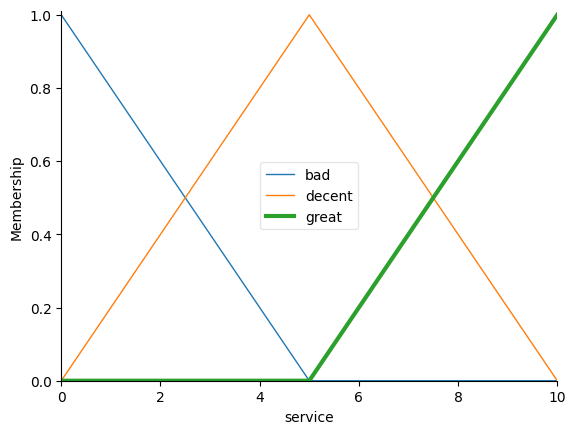

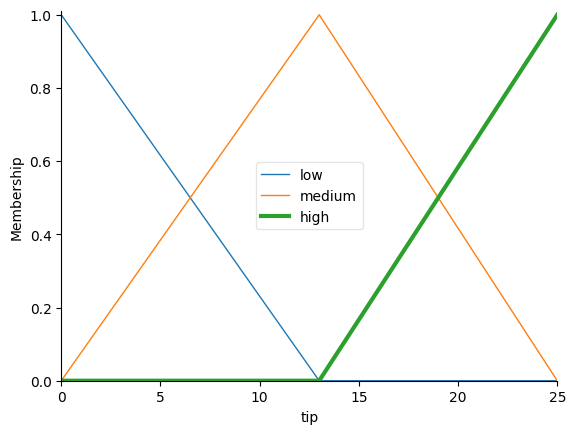

In [7]:
# You can see how these look with .view()
quality[ 'poor' ].view()
service['great'].view()
tip['high'].view()

In [8]:
rule1 = ctrl.Rule(quality[ 'poor' ] | service[ 'bad' ], tip[ 'low' ])
rule2 = ctrl.Rule(service[ 'decent' ], tip[ 'medium' ])
rule3 = ctrl.Rule(service[ 'great' ] | quality[ 'amazing' ], tip[ 'high' ])
# rule1.view()
# rule2.view()

19.847607361963192


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


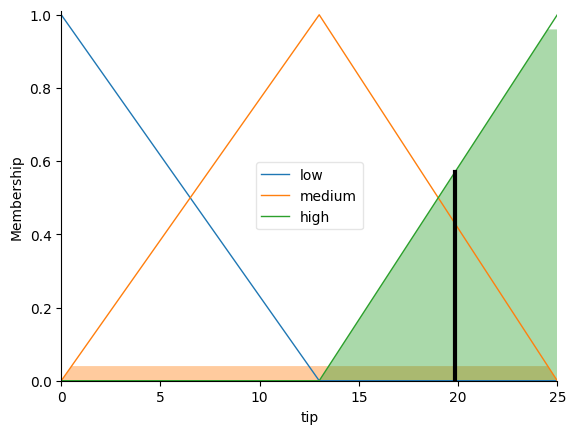

In [9]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input[ 'quality' ] = 6.5
tipping.input[ 'service' ] = 9.8
# Crunch the numbers
tipping.compute()
print (tipping.output[ 'tip' ])
tip.view(sim=tipping)
